# Compactação de Imagens utilizando-se de Wavelets
## Autor: Kevin Pergher, Métodos Computacionais da Física C, 2021/01
## Baseado em: "Data-Driven Engineering" de Steve Brunton & J. Nathan Kutz

## Explore Wavelets: http://wavelets.pybytes.com/

### Realizando os imports iniciais e defindo as imagens

In [23]:
from matplotlib.image import imread
import numpy as np
import matplotlib.pyplot as plt
import os
import pywt
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})

### Compressão da imagem em Wavelets
### Leia as Docs em: https://pywavelets.readthedocs.io/en/latest/ref/2d-dwt-and-idwt.html

### Nesse caso utilizaremos como "Mother-Wavelet" o wavelet de Haar, proposto em 1909
### Haar Wavelet: https://en.wikipedia.org/wiki/Haar_wavelet

$\psi(t) = \begin{cases} 1, & \mbox{se }0 \le t < \frac{1}{2} \\ -1, & \mbox{se }\frac{1}{2} \le t < 1 \\ 0, & \mbox{de outro modo} \end{cases} $

In [24]:
A = imread('einstein.jfif')
# Convertendo em escala cinza (Gray-Scale)
B = np.mean(A, -1)

# Compressão
n = 4
w = 'db1'
coeffs = pywt.wavedec2(B,wavelet='haar',level=n)

In [25]:
coeff_arr, coeff_slices = pywt.coeffs_to_array(coeffs)
Csort = np.sort(np.abs(coeff_arr.reshape(-1)))
Csort

array([   0.    ,    0.    ,    0.    , ..., 3602.8125, 3613.    ,
       3722.875 ])

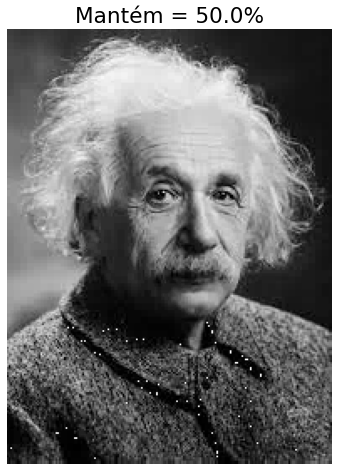

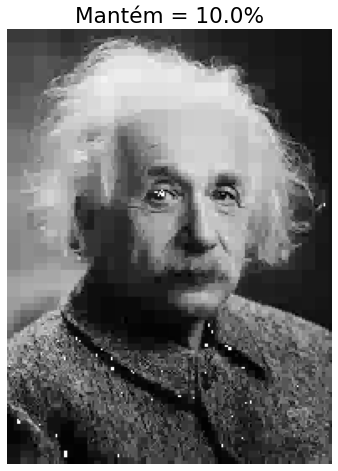

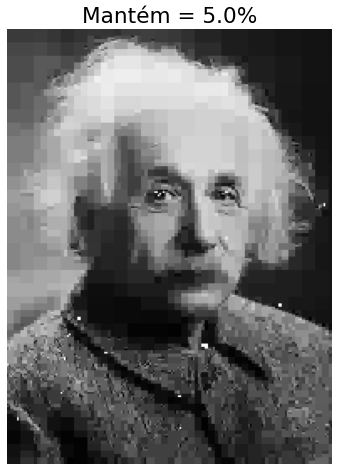

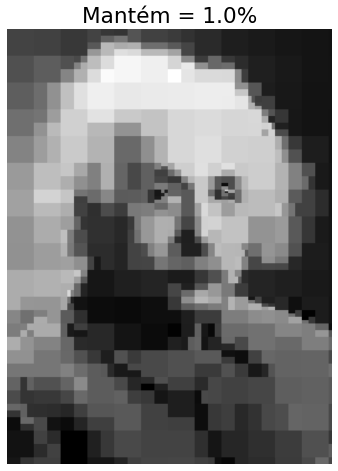

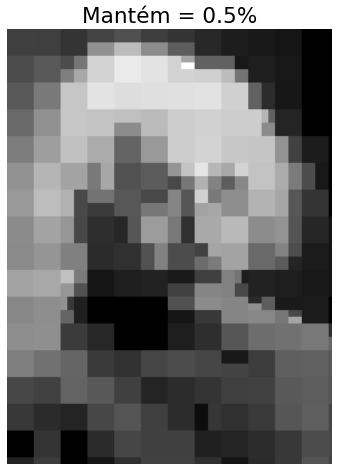

In [27]:
for keep in (0.5, 0.1, 0.05, 0.01, 0.005):
    thresh = Csort[int(np.floor((1-keep)*len(Csort)))]
    ind = np.abs(coeff_arr) > thresh
    Cfilt = coeff_arr * ind
    coeffs_filt = pywt.array_to_coeffs(Cfilt,coeff_slices,output_format='wavedec2')
    
    Arecon = pywt.waverec2(coeffs_filt,wavelet=w)
    plt.figure()
    plt.imshow(Arecon.astype('uint8'),cmap='gray')
    plt.axis('off')
    plt.title('Mantém = ' + str(keep*100) + '%')